In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\KIIT\Downloads\placement.csv")

In [5]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [56]:
df.shape

(1000, 3)

<Axes: xlabel='placement_exam_marks', ylabel='Count'>

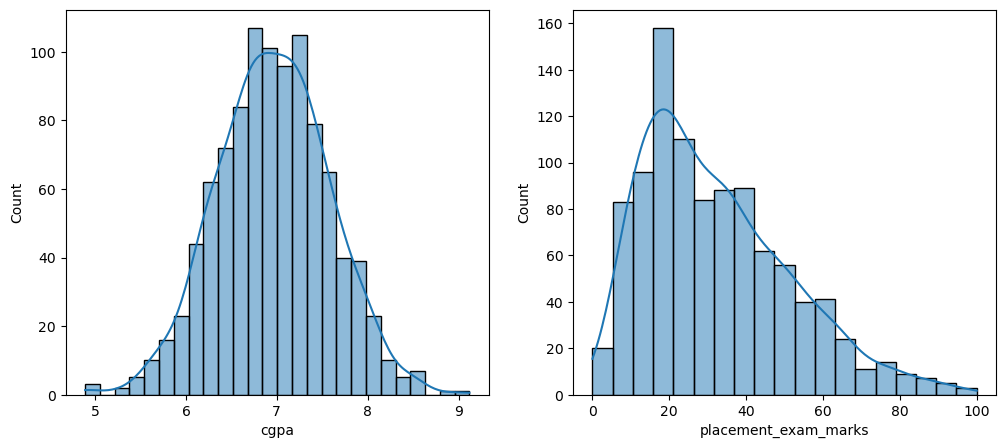

In [23]:
fig,axes=plt.subplots(1,2,figsize=(12,5))
sns.histplot(x=df['cgpa'],kde=True,ax=axes[0])
sns.histplot(x=df['placement_exam_marks'],ax=axes[1],kde=True)

In [25]:
#we cannot apply zscore method in placement_exam_marks because it is right skewed.

In [27]:
df['cgpa'].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

In [31]:
print("Highest allowed value is",df['cgpa'].mean()+3*df['cgpa'].std())
print("lowest allowed value is",df['cgpa'].mean()-3*df['cgpa'].std())

Highest allowed value is 8.808933625397168
lowest allowed value is 5.113546374602832


In [43]:
mask=(df['cgpa']>8.80 )| (df['cgpa']<5.11)
df[mask]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


__Trimming__

In [50]:
newdf=df[(df['cgpa']<8.80) & (df['cgpa']>5.11)]

In [52]:
newdf.sample(5)

,cgpa,placement_exam_marks,placed
49,8.23,28.0,1
167,6.65,48.0,1
375,7.31,31.0,0
521,5.72,37.0,1
826,7.05,32.0,0


In [54]:
newdf.shape

(995, 3)

__Else we can find Zscore of each element of cgpa column and remove having greater than 3 and smaller than -3__

In [61]:
df['cgpa_zscore']=(df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()

In [63]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [69]:
df[df['cgpa']>3].head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [74]:
#same way we can trim them as above

__capping__

In [83]:
upper_limit=df['cgpa'].mean()+3*df['cgpa'].std()
lower_limit=df['cgpa'].mean()-3*df['cgpa'].std()

In [85]:
upper_limit

8.808933625397168

In [87]:
lower_limit

5.113546374602832

In [97]:
df['cgpa']=np.where(df['cgpa']>upper_limit,upper_limit,df['cgpa'])

In [99]:
df['cgpa']=np.where(df['cgpa']<lower_limit,lower_limit,df['cgpa'])

In [101]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [103]:
df.shape

(1000, 4)

In [109]:
df[df['cgpa']<lower_limit]

,cgpa,placement_exam_marks,placed,cgpa_zscore


In [111]:
df.describe()

,cgpa,placement_exam_marks,placed,cgpa_zscore
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,6.961499,32.225000,0.489000,-1.474376e-16
std,0.612688,19.130822,0.500129,1.000000e+00
min,5.113546,0.000000,0.000000,-3.362960e+00
25%,6.550000,17.000000,0.000000,-6.677081e-01
50%,6.960000,28.000000,0.000000,-2.013321e-03
75%,7.370000,44.000000,1.000000,6.636815e-01
max,8.808934,100.000000,1.000000,3.505062e+00
